# Week 4 Programming Assignment

**Brian Roepke**  
**Data 110**  
**Feb 7th, 2021**  

This is a 3 part assignment with introductions to numpy, pandas and matplotlib. Each worth 10 points for a total of 30 points. Each part builds upon the previous.    

Submit as a single jupyter notebook in html format.  Clearly document each section using comments and markdown.  

1.  Read the attached intro to numpy and do the assignment at the end. Sample output is shown.
1.  Read the attached intro to pandas and do the assignment at the end. Sample output is shown.
1.  Read visualization section of MoviesDataAnalysis, then add the following visualizations.
  1. plot a line graph of monthly precip levels 
  1. bar plot of average precip by season 
  1. boxplot of average precip by season 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Numpy
Import Numeric Data from Text Files Into Numpy Arrays  
 * download the average monthly precipitation (inches) for Boulder, CO collected by the U.S. National Oceanic and Atmospheric Administration (NOAA)
     * data values: https://ndownloader.figshare.com/files/12565616
     * col values: https://ndownloader.figshare.com/files/12565619
 * load the data into a numpy array and print the values. Verify the type of the data structure.
 * run summary statistics: mean, median, standard deviation, min, max
 * get the average seasonal preciptation (eg: winter, ..fall)

### Import Data  
Using the Numpy `loadtxt` method, import the two data files.  One contains categorical values for months, and the other are average monthly precipation values.

In [2]:
months = np.loadtxt('months.txt', dtype='str')
values = np.loadtxt('avg-monthly-precip.txt')
print("Months:", months)
print("Values:", values)
print(type(months))
print(type(values))

Months: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'June' 'July' 'Aug' 'Sept' 'Oct' 'Nov'
 'Dec']
Values: [0.7  0.75 1.85 2.93 3.05 2.02 1.93 1.62 1.84 1.31 1.39 0.84]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Summary Statistics
Using Numpy's built in functions for calcualating various statistical values.  We can see the mean precip is `1.69` and the median is `1.73`.  The standard deviation for the 12 months is `0.73`.  A min of `0.7` and max of `3.05` for the 12 month period.

In [3]:
print("Mean precipitation: {}".format(np.mean(values)))
print("Median precipitation: {}".format(np.median(values)))
print("Standard Deviation of precipitation: {}".format(np.std(values)))
print("Min precipitation: {}".format(np.min(values)))
print("Max precipitation: {}".format(np.max(values)))

Mean precipitation: 1.6858333333333333
Median precipitation: 1.73
Standard Deviation of precipitation: 0.7318408107110604
Min precipitation: 0.7
Max precipitation: 3.05


### Calculate Seasonal Averages
Calculating the averages per three-month sesonal period, we can see that **winter** is the lightest month for precip, and **spring** is the heaviest due to **May** and **April** having the highest rainfall for the 12 month cycle.  **Summer** and **Fall** precip levels are similar at `1.86` and `1.51` respectively. 

In [4]:
# Winter – December, January and February.
# Spring – March, April and May.
# Summer – June, July and August.
# Fall – September, October and November.
winter = np.mean(values[np.array([0,1,11])])
spring = np.mean(values[2:5])
summer = np.mean(values[5:8])
fall = np.mean(values[8:11])

print("Avg precipitation for Winter = {}".format(winter))
print("Avg precipitation for Spring = {}".format(spring))
print("Avg precipitation for Summer = {}".format(summer))
print("Avg precipitation for Fall = {}".format(fall))

Avg precipitation for Winter = 0.7633333333333333
Avg precipitation for Spring = 2.61
Avg precipitation for Summer = 1.8566666666666667
Avg precipitation for Fall = 1.5133333333333334


## Part 2: Pandas
Modify your assignment from intro to Numpy:  
 * Create a pandas dataframe (from the files previously) with columns: months, precip, season and save to a csv file
 * Read from the csv file from the above step into a df
 * Print the shape and column names of the df
 * Create a new df2 using groupby with average precip by season
 * Create a new df3 using groupby with summary statistics by season
 * Print the index and columns of df3
 * Show precip summary stats for Summer and Winter
 * Show only min and max for all seasons

### Import Data
Start by loading the data from the text files into Numpy arrays.  Similar to what was done above, but later theese will be added as the index and a column in the Panda's dataframe.  
Following that, a column of categorical values for the four-seasons is created and inserted into the DataFrame.  This column will be useful for doing aggregations by season.

In [5]:
months = np.loadtxt('months.txt', dtype='str')
values = np.loadtxt('avg-monthly-precip.txt')
months = pd.Series(months)
values = pd.Series(values)
d = {'precip' : values, 'month' : months}
df = pd.DataFrame(d, columns=['precip', 'month'])
df

,precip,month
0,0.70,Jan
1,0.75,Feb
2,1.85,Mar
3,2.93,Apr
4,3.05,May
5,2.02,June
6,1.93,July
7,1.62,Aug
8,1.84,Sept
9,1.31,Oct


In [6]:
# Add Season Column
seasons = ['Winter', 'Winter', 
           'Spring', 'Spring', 'Spring', 
           'Summer', 'Summer', 'Summer', 
           'Fall', 'Fall', 'Fall', 'Winter']
df.insert(0, 'season', seasons)
df

,season,precip,month
0,Winter,0.70,Jan
1,Winter,0.75,Feb
2,Spring,1.85,Mar
3,Spring,2.93,Apr
4,Spring,3.05,May
5,Summer,2.02,June
6,Summer,1.93,July
7,Summer,1.62,Aug
8,Fall,1.84,Sept
9,Fall,1.31,Oct


### Persist the Data to a CSV
Now that there is a fully merged DataFrame representing all of the data, write it to a CSV file to persist it, then read it back into memory to ensure that the operation was sucessful.

In [7]:
# writing to csv
df.to_csv('precip.csv', index = True)

# reading from csv into a dataframe
df = pd.read_csv('precip.csv', delimiter=',', index_col=0)

### Inspect the Data
Look at `shape`, the `index` as well as `column` names.

In [8]:
df.shape

(12, 3)

In [9]:
df.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [10]:
df.columns

Index(['season', 'precip', 'month'], dtype='object')

### Average Precip by Season
Using Panda's `groupby` function, aggregate the data for each season and calculate the `mean`.

**Note:** This is the same data that was calculated above with Numpy.

In [11]:
df2 = df.groupby('season')[['precip']].mean()
df2

,precip
season,
Fall,1.513333
Spring,2.610000
Summer,1.856667
Winter,0.763333


### Calculate Summary Statistics Per Season
As opposed to calculating them for the entire year, here we have standard summary statistics calculated per **season**.  The above calculations are included below in the `mean` column, other stats included as well. 

**Observations:**
 * As mentioned above, Spring was the wettest season, winter was the dryest.
 * Winter has the lowest standard deviation of the seasons, spring with the largest. (e.g. How consistent is the rain during the months of the season.)
 * The wettest season has the month with the max precip, and likewise the dryest, has the month with the lowest.

In [12]:
# Create a new df3 using groupby with summary statistics by season
df3 = df.groupby('season')[['precip']].describe()
df3

precip                                                    
        count      mean       std   min    25%   50%    75%   max
season                                                           
Fall      3.0  1.513333  0.285715  1.31  1.350  1.39  1.615  1.84
Spring    3.0  2.610000  0.660908  1.85  2.390  2.93  2.990  3.05
Summer    3.0  1.856667  0.209841  1.62  1.775  1.93  1.975  2.02
Winter    3.0  0.763333  0.070946  0.70  0.725  0.75  0.795  0.84

In [13]:
# Print the index and columns of df3
df3.index

Index(['Fall', 'Spring', 'Summer', 'Winter'], dtype='object', name='season')

In [14]:
df3.columns

MultiIndex([('precip', 'count'),
            ('precip',  'mean'),
            ('precip',   'std'),
            ('precip',   'min'),
            ('precip',   '25%'),
            ('precip',   '50%'),
            ('precip',   '75%'),
            ('precip',   'max')],
           )

### Show only Summer and Winter

In [15]:
df3.loc[['Summer', 'Winter'], :]

precip                                                    
        count      mean       std   min    25%   50%    75%   max
season                                                           
Summer    3.0  1.856667  0.209841  1.62  1.775  1.93  1.975  2.02
Winter    3.0  0.763333  0.070946  0.70  0.725  0.75  0.795  0.84

### Show only Min and Max for All Seasons

In [16]:
df3.loc[:, [('precip', 'min'), ('precip', 'max')]]

precip      
          min   max
season             
Fall     1.31  1.84
Spring   1.85  3.05
Summer   1.62  2.02
Winter   0.70  0.84

## Part 3: Visualizations
Next, taking the data and aggreagations from above, display it in a set of visualizations.

### A. Plot a line graph of monthly precip levels
This clearly shows the ramp from **Feb** to **May** in the increasing precip levels, falling gradually through the rest of the year with one exception in **September**. 

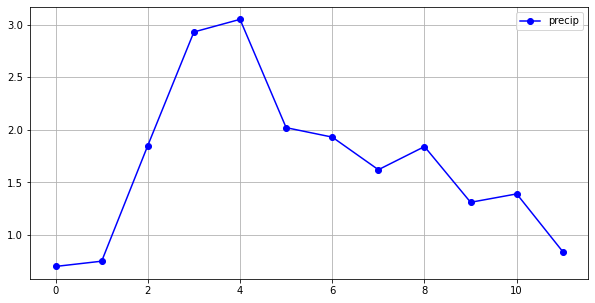

In [17]:
df.plot(y='precip', marker='o', color='b', figsize=(10,5), grid=True);

### B.Bar plot of average precip by season
Similar view to above, but group/aggregated by season instead of month. 

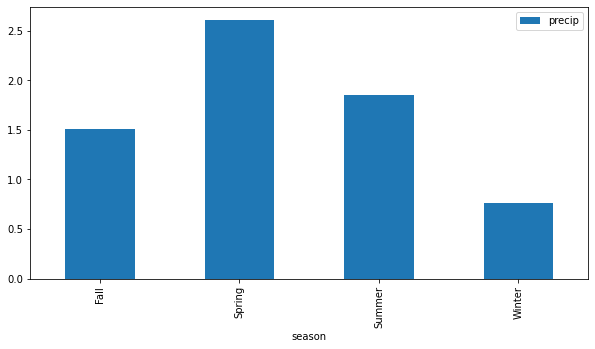

In [18]:
df2.plot(kind='bar', figsize=(10,5));

### C. Boxplot of average precip by season
And similar to the bar plot above, box plots show summary statistics for each season.
 * The box representes the inner quartile (25%-50% percentiles of the distribution of data.
 * The green line represents the median
 * The whiskers are the min and max values for the season. 

<AxesSubplot:>

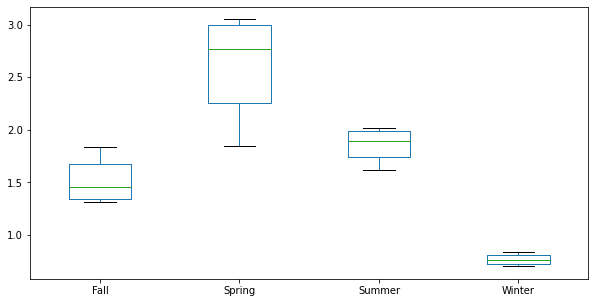

In [19]:
df.groupby('season')[['precip']].describe().T.boxplot(figsize=(10,5), grid=False, showfliers=False)